<a href="https://colab.research.google.com/github/Endriyas21/NLP_Reading_Comprehension_SQuAD/blob/main/Endriyas_Zenagabriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls

drive  sample_data


In [ ]:
!pip install --quiet bitsandbytes
!pip install --quiet git+https://github.com/huggingface/transformers.git # Install latest version of transformers
!pip install --quiet accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 21.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install transformers
!pip install torch
!pip install datasets
!pip install accelerate -U
!pip install transformers[torch] accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requi

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

Fri Jul 26 06:33:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install bitsandbytes

In [ ]:
import json

In [ ]:
# Specify the path to your .json file
train_data = '/content/drive/MyDrive/Datasets/SQuAD 2.0/train-v2.0.json'
dev_data = '/content/drive/MyDrive/Datasets/SQuAD 2.0/dev-v2.0.json'

In [ ]:
# Load the dataset with error handling
try:
    with open(train_data, 'r', encoding='utf-8') as f:
        train_data = json.load(f)
    with open(dev_data, 'r', encoding='utf-8') as f:
        dev_data = json.load(f)
except FileNotFoundError:
    print("Error: JSON file not found.")
except IOError as e:
    print(f"Error reading JSON file: {e}")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON file: {e}")
else:
    print("JSON files loaded successfully.")

JSON files loaded successfully.


In [ ]:
# Open and load the .jsonl file line by line
traindata = []
with open(train_data, 'r') as f:
    for line in f:
        traindata.append(json.loads(line))  # Load each line as a separate JSON object

devdata = []
with open(dev_data, 'r') as f:
    for line in f:
        devdata.append(json.loads(line))  # Load each line as a separate JSON object

In [ ]:
from transformers import pipeline
from transformers import BertTokenizerFast, AutoModelForQuestionAnswering, pipeline


# Initialize the tokenizer and model
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"
tokenizer = BertTokenizerFast.from_pretrained(model_name)

qa_pipeline = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad", tokenizer=tokenizer)

# Test the pipeline with an example
context = "My name is John Doe and I live in New York."
question = "What is my name?"
print(qa_pipeline(question=question, context=context))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.990822434425354, 'start': 11, 'end': 19, 'answer': 'John Doe'}


In [ ]:
import torch
torch.cuda.is_available()


True

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'score': 0.990822434425354, 'start': 11, 'end': 19, 'answer': 'John Doe'}


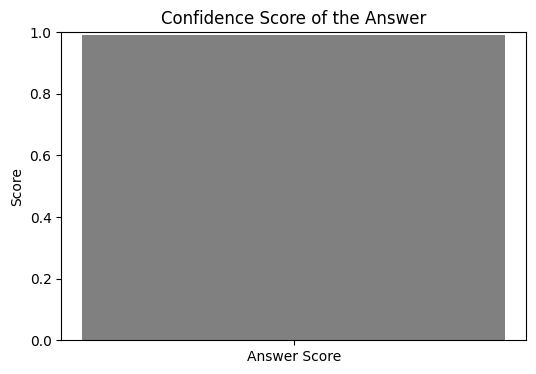

In [ ]:
from transformers import BertTokenizerFast, AutoModelForQuestionAnswering, pipeline
import matplotlib.pyplot as plt

# Initialize the tokenizer and model
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"
tokenizer = BertTokenizerFast.from_pretrained(model_name)

qa_pipeline = pipeline("question-answering", model=model_name, tokenizer=tokenizer, device=0)

# Test the pipeline with an example
context = "My name is John Doe and I live in New York."
question = "What is my name?"
result = qa_pipeline(question=question, context=context)

# Extract the score
score = result['score']

# Print result for reference
print(result)

# Function to plot the score
def plot_score(score):
    labels = ['Answer Score']
    scores = [score]

    plt.figure(figsize=(6, 4))
    plt.bar(labels, scores, color='grey')
    plt.ylim(0, 1)  # Since scores are between 0 and 1
    plt.ylabel('Score')
    plt.title('Confidence Score of the Answer')
    plt.show()

# Plot the score
plot_score(score)


In [ ]:
def preprocess_squad(data):
    contexts = []
    questions = []
    answers = []
    for article in data['data']:
        for paragraph in article['paragraphs']:
            context = paragraph['context']
            for qa in paragraph['qas']:
                question = qa['question']
                if not qa['is_impossible']:
                    answer = qa['answers'][0]
                else:
                    answer = {'text': '', 'answer_start': 0, 'answer_end': 0}
                contexts.append(context)
                questions.append(question)
                answers.append(answer)
    return contexts, questions, answers

train_contexts, train_questions, train_answers = preprocess_squad(train_data)
dev_contexts, dev_questions, dev_answers = preprocess_squad(dev_data)

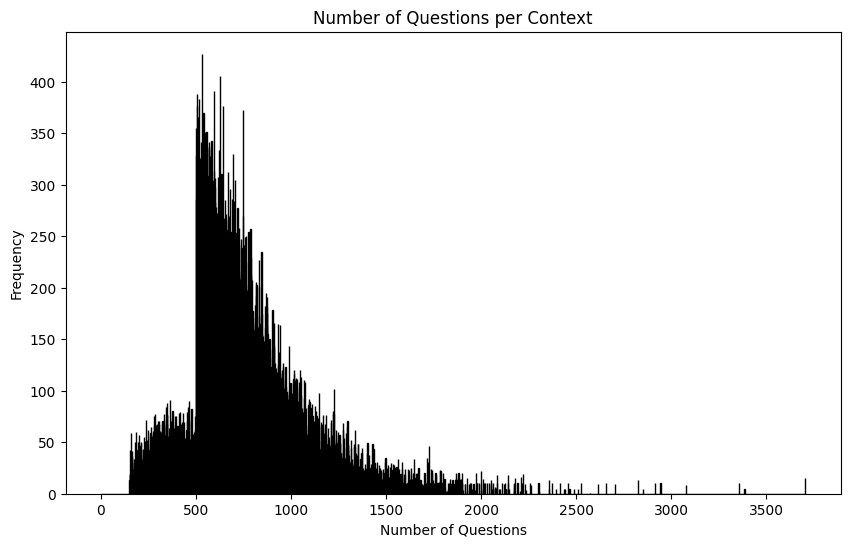

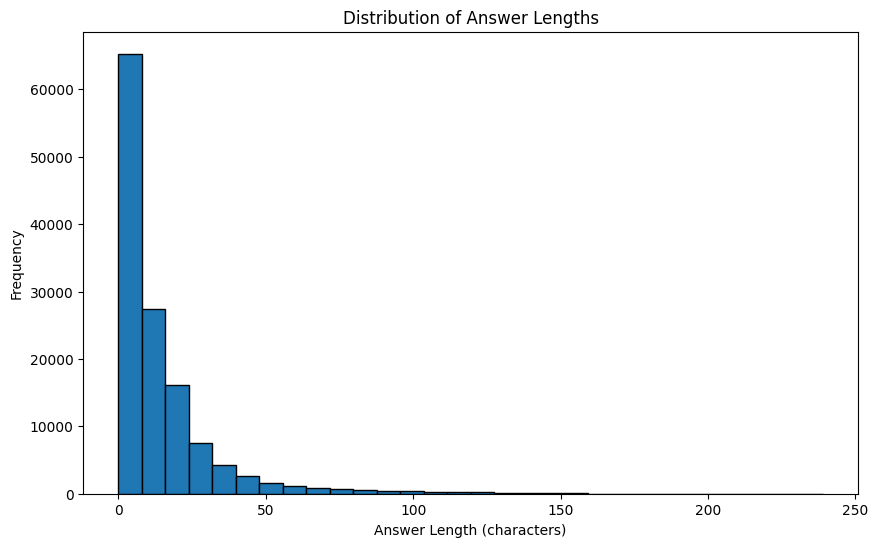

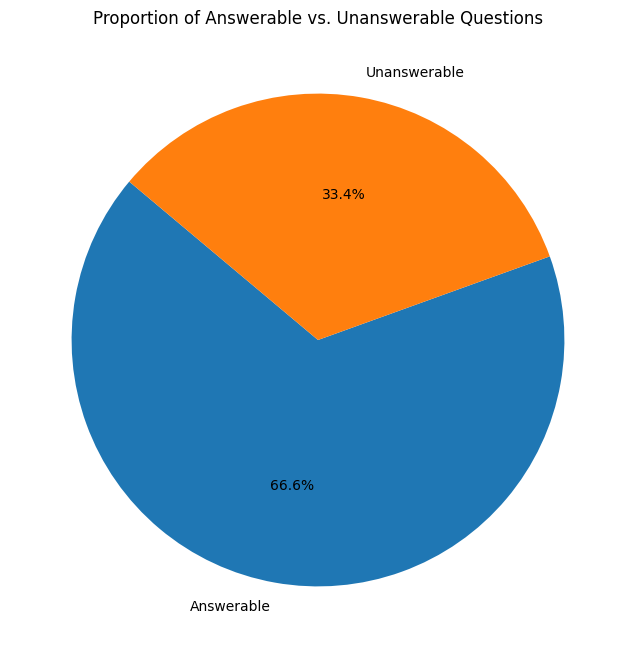

In [ ]:
import matplotlib.pyplot as plt

def preprocess_squad(data):
    contexts = []
    questions = []
    answers = []
    for article in data['data']:
        for paragraph in article['paragraphs']:
            context = paragraph['context']
            for qa in paragraph['qas']:
                question = qa['question']
                if not qa['is_impossible']:
                    answer = qa['answers'][0]
                else:
                    answer = {'text': '', 'answer_start': 0, 'answer_end': 0}
                contexts.append(context)
                questions.append(question)
                answers.append(answer)
    return contexts, questions, answers

train_contexts, train_questions, train_answers = preprocess_squad(train_data)
dev_contexts, dev_questions, dev_answers = preprocess_squad(dev_data)

def get_answer_length(answer):
    return len(answer['text'])

def is_answerable(answer):
    return answer['text'] != ''

# Get the number of questions per context
num_questions_per_context = [len(context) for context in train_contexts]

# Get the lengths of the answers
answer_lengths = [get_answer_length(answer) for answer in train_answers]

# Get the number of answerable vs unanswerable questions
num_answerable = sum(is_answerable(answer) for answer in train_answers)
num_unanswerable = len(train_answers) - num_answerable

# Plot number of questions per context
plt.figure(figsize=(10, 6))
plt.hist(num_questions_per_context, bins=range(1, max(num_questions_per_context) + 1), edgecolor='black')
plt.title('Number of Questions per Context')
plt.xlabel('Number of Questions')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of answer lengths
plt.figure(figsize=(10, 6))
plt.hist(answer_lengths, bins=30, edgecolor='black')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Plot number of answerable vs unanswerable questions
plt.figure(figsize=(10, 6))
plt.pie([num_answerable, num_unanswerable], labels=['Answerable', 'Unanswerable'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Answerable vs. Unanswerable Questions')
plt.show()


In [ ]:
print("Sample train contexts: ", train_contexts[:2])
print("Sample train questions: ", train_questions[:2])
print("Sample train answers: ", train_answers[:2])

Sample train contexts:  ['Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".', 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in t

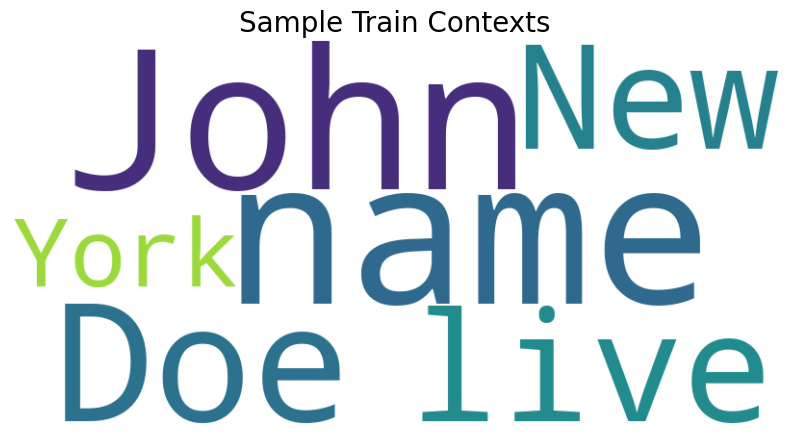

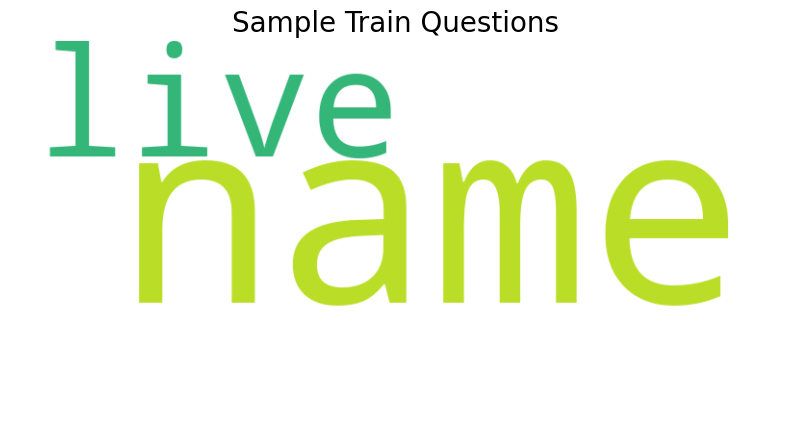

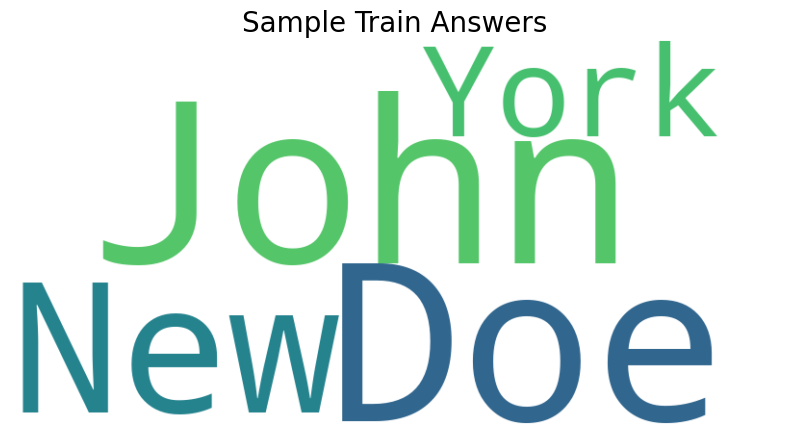

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def preprocess_squad(data):
    contexts = []
    questions = []
    answers = []
    for article in data['data']:
        for paragraph in article['paragraphs']:
            context = paragraph['context']
            for qa in paragraph['qas']:
                question = qa['question']
                if not qa['is_impossible']:
                    answer = qa['answers'][0]
                else:
                    answer = {'text': '', 'answer_start': 0, 'answer_end': 0}
                contexts.append(context)
                questions.append(question)
                answers.append(answer)
    return contexts, questions, answers

# Sample data
train_data = {
    'data': [
        {
            'paragraphs': [
                {
                    'context': 'My name is John Doe and I live in New York.',
                    'qas': [
                        {'question': 'What is my name?', 'is_impossible': False, 'answers': [{'text': 'John Doe', 'answer_start': 11}]},
                        {'question': 'Where do I live?', 'is_impossible': False, 'answers': [{'text': 'New York', 'answer_start': 31}]}
                    ]
                },
                {
                    'context': 'The Eiffel Tower is located in Paris, France.',
                    'qas': [
                        {'question': 'What is located in Paris?', 'is_impossible': False, 'answers': [{'text': 'The Eiffel Tower', 'answer_start': 0}]},
                        {'question': 'Where is the Eiffel Tower?', 'is_impossible': False, 'answers': [{'text': 'Paris, France', 'answer_start': 31}]}
                    ]
                }
            ]
        }
    ]
}

# Preprocess the data
train_contexts, train_questions, train_answers = preprocess_squad(train_data)
dev_contexts, dev_questions, dev_answers = preprocess_squad(train_data)

# Combine the sample contexts, questions, and answers into strings
sample_contexts = " ".join(train_contexts[:2])
sample_questions = " ".join(train_questions[:2])
sample_answers = " ".join([answer['text'] for answer in train_answers[:2]])

# Function to generate and display a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

# Generate word clouds for contexts, questions, and answers
generate_wordcloud(sample_contexts, 'Sample Train Contexts')
generate_wordcloud(sample_questions, 'Sample Train Questions')
generate_wordcloud(sample_answers, 'Sample Train Answers')


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'score': 0.990822434425354, 'start': 11, 'end': 19, 'answer': 'John Doe'}


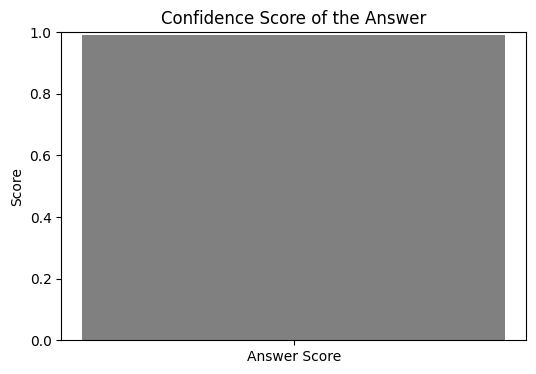

In [ ]:
def add_end_idx(answers, contexts):
    for answer, context in zip(answers, contexts):
        if answer['text']:
            answer_end = answer['answer_start'] + len(answer['text'])
            answer['answer_end'] = answer_end

add_end_idx(train_answers, train_contexts)
add_end_idx(dev_answers, dev_contexts)

# Load model with fine-tuned weights
model = AutoModelForQuestionAnswering.from_pretrained(model_name)

# Create the pipeline for question answering
qa_pipeline = pipeline("question-answering", model=model, tokenizer=tokenizer, device=0)

# Test the pipeline with an example
context = "My name is John Doe and I live in New York."
question = "What is my name?"
result = qa_pipeline(question=question, context=context)

# Extract the score
score = result['score']

# Print result for reference
print(result)

# Function to plot the score
def plot_score(score):
    labels = ['Answer Score']
    scores = [score]

    plt.figure(figsize=(6, 4))
    plt.bar(labels, scores, color='grey')
    plt.ylim(0, 1)  # Since scores are between 0 and 1
    plt.ylabel('Score')
    plt.title('Confidence Score of the Answer')
    plt.show()

# Plot the score
plot_score(score)

In [ ]:
# Initialize the model and tokenizer
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"
tokenizer = BertTokenizerFast.from_pretrained(model_name)
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
qa_pipeline = pipeline("question-answering", model=model, tokenizer=tokenizer, device=0)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Function to predict answers
def generate_predictions(dev_data):
    predictions = {}
    for article in dev_data['data']:
        for paragraph in article['paragraphs']:
            context = paragraph['context']
            for qa in paragraph['qas']:
                question_id = qa['id']
                question = qa['question']

                try:
                    # Generate answer using the pipeline
                    answer = qa_pipeline(question=question, context=context)

                    # Print debugging info
                    print(f"Question ID: {question_id}")
                    print(f"Question: {question}")
                    print(f"Context: {context[:200]}...")  # Print only part of the context for brevity
                    print(f"Answer: {answer}")

                    # Check if answer has the required keys
                    if 'answer' in answer and 'start' in answer and 'end' in answer:
                        predictions[question_id] = {
                            'text': answer['answer'],
                            'start': answer['start'],
                            'end': answer['end']
                        }
                    else:
                        print(f"Unexpected answer format for question ID: {question_id}")

                except Exception as e:
                    print(f"Error processing question ID {question_id}: {e}")

    return predictions

Question ID: 56ddde6b9a695914005b9628
Question: In what country is Normandy located?
Context: The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("...
Answer: {'score': 0.9912787675857544, 'start': 159, 'end': 165, 'answer': 'France'}
Question ID: 56ddde6b9a695914005b9629
Question: When were the Normans in Normandy?
Context: The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("...
Answer: {'score': 0.7390105128288269, 'start': 94, 'end': 117, 'answer': '10th and 11th centuries'}
Question ID: 56ddde6b9a695914005b962a
Question: From which countries did the Norse originate?
Context: The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries g

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Streaming output truncated to the last 5000 lines.
Question: Who ranked Warsaw as 22nd most liveable city in the world?
Context: In 2012 the Economist Intelligence Unit ranked Warsaw as the 32nd most liveable city in the world. It was also ranked as one of the most liveable cities in Central Europe. Today Warsaw is considered a...
Answer: {'score': 0.5610014200210571, 'start': 8, 'end': 39, 'answer': 'the Economist Intelligence Unit'}
Question ID: 5ad4bcc45b96ef001a109e9d
Question: What is FMCG's economy characterized by?
Context: In 2012 the Economist Intelligence Unit ranked Warsaw as the 32nd most liveable city in the world. It was also ranked as one of the most liveable cities in Central Europe. Today Warsaw is considered a...
Answer: {'score': 0.4202232360839844, 'start': 398, 'end': 411, 'answer': 'manufacturing'}
Question ID: 5ad4bcc45b96ef001a109e9e
Question: What exchange in the FMCG is one of the most important for Central and Eastern Europe?
Context: In 2012 the Economist In

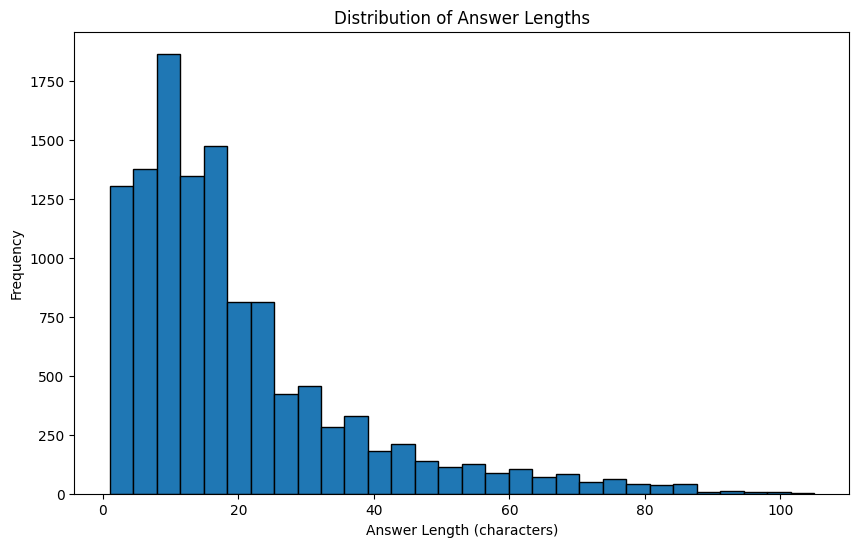

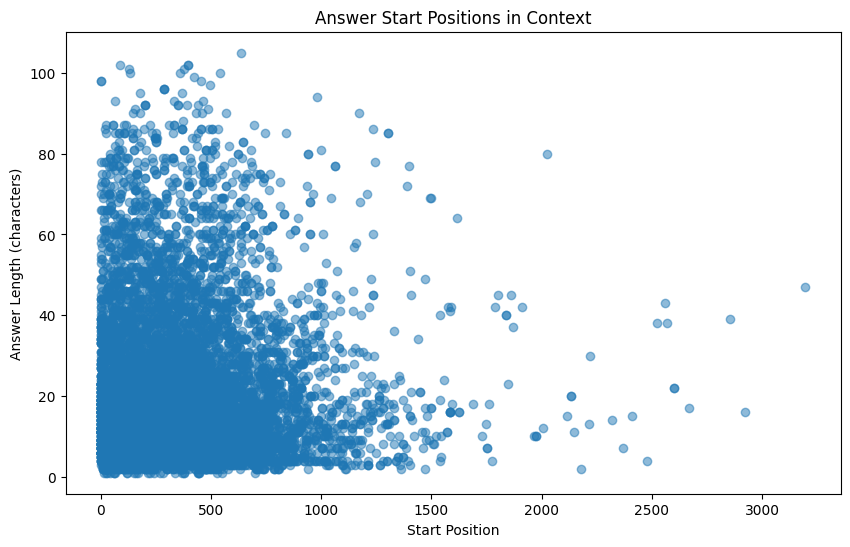

In [ ]:
import json
import matplotlib.pyplot as plt

# Function to generate predictions (adjusted to ensure all relevant data is included)
def generate_predictions(dev_data):
    predictions = []
    for article in dev_data['data']:
        for paragraph in article['paragraphs']:
            context = paragraph['context']
            for qa in paragraph['qas']:
                question_id = qa['id']
                question = qa['question']

                try:
                    # Generate answer using the pipeline
                    answer = qa_pipeline(question=question, context=context)

                    # Print debugging info
                    print(f"Question ID: {question_id}")
                    print(f"Question: {question}")
                    print(f"Context: {context[:200]}...")  # Print only part of the context for brevity
                    print(f"Answer: {answer}")

                    # Check if answer has the required keys
                    if 'answer' in answer and 'start' in answer and 'end' in answer:
                        predictions.append({
                            'question_id': question_id,
                            'question': question,
                            'context': context,
                            'answer_text': answer['answer'],
                            'start': answer['start'],
                            'end': answer['end']
                        })
                    else:
                        print(f"Unexpected answer format for question ID: {question_id}")

                except Exception as e:
                    print(f"Error processing question ID {question_id}: {e}")

    return predictions

# Generate predictions
predictions = generate_predictions(dev_data)

# Save predictions to file
with open('predictions.json', 'w') as f:
    json.dump(predictions, f, indent=4)

print("Predictions saved to predictions.json")

# Load predictions from file
with open('predictions.json', 'r') as f:
    predictions = json.load(f)

# Extract answer lengths and positions
answer_lengths = [pred['end'] - pred['start'] for pred in predictions]
start_positions = [pred['start'] for pred in predictions]

# Plot distribution of answer lengths
plt.figure(figsize=(10, 6))
plt.hist(answer_lengths, bins=30, edgecolor='black')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Plot answer start positions
plt.figure(figsize=(10, 6))
plt.scatter(start_positions, answer_lengths, alpha=0.5)
plt.title('Answer Start Positions in Context')
plt.xlabel('Start Position')
plt.ylabel('Answer Length (characters)')
plt.show()


Streaming output truncated to the last 5000 lines.
Question: Who ranked Warsaw as 22nd most liveable city in the world?
Context: In 2012 the Economist Intelligence Unit ranked Warsaw as the 32nd most liveable city in the world. It was also ranked as one of the most liveable cities in Central Europe. Today Warsaw is considered a...
Answer: {'score': 0.5610014200210571, 'start': 8, 'end': 39, 'answer': 'the Economist Intelligence Unit'}
Question ID: 5ad4bcc45b96ef001a109e9d
Question: What is FMCG's economy characterized by?
Context: In 2012 the Economist Intelligence Unit ranked Warsaw as the 32nd most liveable city in the world. It was also ranked as one of the most liveable cities in Central Europe. Today Warsaw is considered a...
Answer: {'score': 0.4202232360839844, 'start': 398, 'end': 411, 'answer': 'manufacturing'}
Question ID: 5ad4bcc45b96ef001a109e9e
Question: What exchange in the FMCG is one of the most important for Central and Eastern Europe?
Context: In 2012 the Economist In

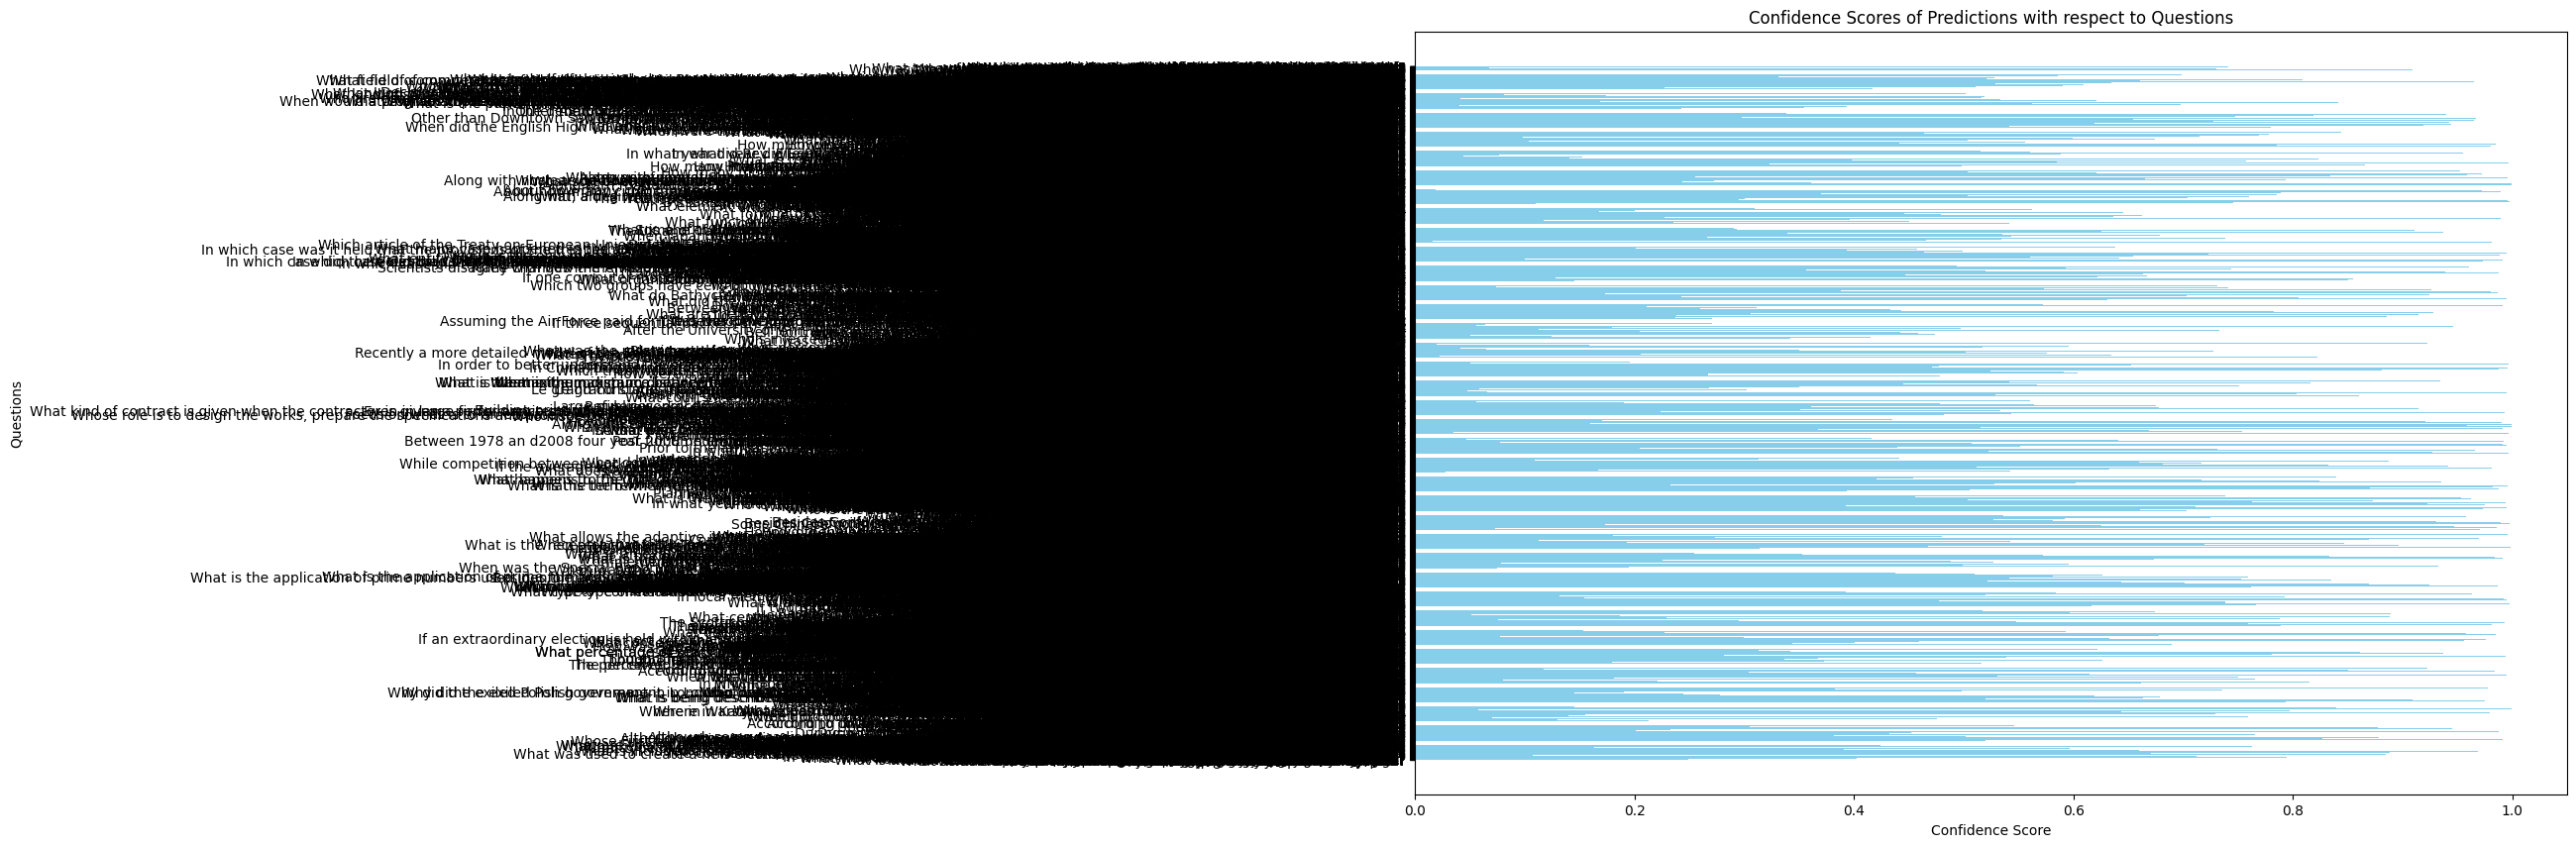

Streaming output truncated to the last 5000 lines.
Context: In 1939, c. 1,300,000 people lived in Warsaw, but in 1945 – only 420,000. During the first years after the war, the population growth was c. 6%, so shortly the city started to suffer from the lack of ...
Question: What had the number of people living in Poland declined to by 1945?
Answer: 420,000
Confidence Score: 0.9026075005531311
--------------------------------------------------------------------------------
Context: In 1939, c. 1,300,000 people lived in Warsaw, but in 1945 – only 420,000. During the first years after the war, the population growth was c. 6%, so shortly the city started to suffer from the lack of ...
Question: When did the Poland area enlargement take place?
Answer: 1951
Confidence Score: 0.9685239195823669
--------------------------------------------------------------------------------
Context: In 1939, c. 1,300,000 people lived in Warsaw, but in 1945 – only 420,000. During the first years after the war, 

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# Function to generate predictions (adjusted to include confidence scores)
def generate_predictions(dev_data):
    predictions = []
    for article in dev_data['data']:
        for paragraph in article['paragraphs']:
            context = paragraph['context']
            for qa in paragraph['qas']:
                question_id = qa['id']
                question = qa['question']

                try:
                    # Generate answer using the pipeline
                    answer = qa_pipeline(question=question, context=context)

                    # Print debugging info
                    print(f"Question ID: {question_id}")
                    print(f"Question: {question}")
                    print(f"Context: {context[:200]}...")  # Print only part of the context for brevity
                    print(f"Answer: {answer}")

                    # Check if answer has the required keys
                    if 'answer' in answer and 'start' in answer and 'end' in answer and 'score' in answer:
                        predictions.append({
                            'question_id': question_id,
                            'question': question,
                            'context': context,
                            'answer_text': answer['answer'],
                            'start': answer['start'],
                            'end': answer['end'],
                            'confidence_score': answer['score']
                        })
                    else:
                        print(f"Unexpected answer format for question ID: {question_id}")

                except Exception as e:
                    print(f"Error processing question ID {question_id}: {e}")

    return predictions

# Generate predictions
predictions = generate_predictions(dev_data)

# Save predictions to file
with open('predictions.json', 'w') as f:
    json.dump(predictions, f, indent=4)

print("Predictions saved to predictions.json")

# Load predictions from file
with open('predictions.json', 'r') as f:
    predictions = json.load(f)

# Create a DataFrame for easier plotting
df = pd.DataFrame(predictions)

# Plot Confidence Scores
plt.figure(figsize=(15, 10))
plt.barh(df['question'], df['confidence_score'], color='skyblue')
plt.xlabel('Confidence Score')
plt.ylabel('Questions')
plt.title('Confidence Scores of Predictions with respect to Questions')
plt.gca().invert_yaxis()  # Invert y-axis to have the first question at the top
plt.show()

# Display Context, Question, Answer, and Confidence Score
for index, row in df.iterrows():
    print(f"Context: {row['context'][:200]}...")
    print(f"Question: {row['question']}")
    print(f"Answer: {row['answer_text']}")
    print(f"Confidence Score: {row['confidence_score']}")
    print('-' * 80)


In [ ]:
# Generate predictions
predictions = generate_predictions(dev_data)

# Save predictions to file
with open('predictions.json', 'w') as f:
    json.dump(predictions, f, indent=4)

print("Predictions saved to predictions.json")

Question ID: 56ddde6b9a695914005b9628
Question: In what country is Normandy located?
Context: The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("...
Answer: {'score': 0.9912787675857544, 'start': 159, 'end': 165, 'answer': 'France'}
Question ID: 56ddde6b9a695914005b9629
Question: When were the Normans in Normandy?
Context: The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("...
Answer: {'score': 0.7390105128288269, 'start': 94, 'end': 117, 'answer': '10th and 11th centuries'}
Question ID: 56ddde6b9a695914005b962a
Question: From which countries did the Norse originate?
Context: The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries g

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Streaming output truncated to the last 5000 lines.
Question: Who ranked Warsaw as 22nd most liveable city in the world?
Context: In 2012 the Economist Intelligence Unit ranked Warsaw as the 32nd most liveable city in the world. It was also ranked as one of the most liveable cities in Central Europe. Today Warsaw is considered a...
Answer: {'score': 0.5610014200210571, 'start': 8, 'end': 39, 'answer': 'the Economist Intelligence Unit'}
Question ID: 5ad4bcc45b96ef001a109e9d
Question: What is FMCG's economy characterized by?
Context: In 2012 the Economist Intelligence Unit ranked Warsaw as the 32nd most liveable city in the world. It was also ranked as one of the most liveable cities in Central Europe. Today Warsaw is considered a...
Answer: {'score': 0.4202232360839844, 'start': 398, 'end': 411, 'answer': 'manufacturing'}
Question ID: 5ad4bcc45b96ef001a109e9e
Question: What exchange in the FMCG is one of the most important for Central and Eastern Europe?
Context: In 2012 the Economist In

In [ ]:
# Print a sample of predictions (first 3 entries)
if predictions:
    for i, (key, value) in enumerate(predictions.items()):
        if i < 3:  # Adjust the number to print as many as you want
            print(f"{key}: {value}")
        else:
            break
else:
    print("No predictions generated.")

56ddde6b9a695914005b9628: {'text': 'France', 'start': 159, 'end': 165}
56ddde6b9a695914005b9629: {'text': '10th and 11th centuries', 'start': 94, 'end': 117}
56ddde6b9a695914005b962a: {'text': 'Denmark, Iceland and Norway', 'start': 256, 'end': 283}


In [ ]:
def generate_predictions(dev_data):
    predictions = {}
    for article in dev_data['data']:
        for paragraph in article['paragraphs']:
            context = paragraph['context']
            for qa in paragraph['qas']:
                question_id = qa['id']
                question = qa['question']

                # Print to verify the loop is processing
                print(f"Processing question ID: {question_id}")
                print(f"Context length: {len(context)}")

                # Generate answer using the pipeline
                answer = qa_pipeline(question=question, context=context)

                # Print raw answer
                print(f"Question ID: {question_id}")
                print(f"Question: {question}")
                print(f"Context: {context[:200]}...")  # Print only part of the context for brevity
                print(f"Answer: {answer}")

                # Store the answer in the predictions dictionary
                predictions[question_id] = {
                    'text': answer['answer'],
                    'start': answer['start'],
                    'end': answer['end']
                }
    return predictions

In [ ]:
with open('dev-v2.0.json', 'r') as f:
    dev_data = json.load(f)

# Print the first few examples to check the structure
print(dev_data['data'][0])

In [ ]:
!python3 evaluate-v2.0 (3).py dev-v2.0.json predictions.json --out-file eval.json

In [ ]:
!python3 evaluate-v2.0.py dev-v2.0.json predictions.json --out-file eval.json

In [ ]:
# Print the first few examples from the training set
for i in range(5):
    print(f"Example {i}:")
    print("Context:", train_contexts[i])
    print("Question:", train_questions[i])
    print("Answer:", train_answers[i])
    print("Input IDs:", train_encodings['input_ids'][i])
    print("Attention Mask:", train_encodings['attention_mask'][i])
    print("Start Position:", train_encodings['start_positions'][i])
    print("End Position:", train_encodings['end_positions'][i])
    print()